In [1]:
import numpy as np
import pandas as pd

import os
for dirname, -,filenames in os.walk(' /kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

SyntaxError: invalid syntax (3970845466.py, line 5)

In [2]:
import numpy as np
import pandas as pd

import os
for dirname,filenames in os.walk(' /kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname,filename))

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv( "C:/Users/prapt/Downloads/archive/delhi_aqi.csv")
df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61
...,...,...,...,...,...,...,...,...,...
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47


In [5]:
df.head()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [6]:
df.tail()

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
18771,2023-01-24 04:00:00,1762.39,4.64,37.01,33.26,30.52,231.15,289.84,6.27
18772,2023-01-24 05:00:00,1735.69,6.82,34.96,46.49,34.33,225.08,280.52,9.12
18773,2023-01-24 06:00:00,1922.61,8.16,40.10,56.51,43.39,242.49,296.07,12.54
18774,2023-01-24 07:00:00,1361.85,9.05,52.78,71.53,100.14,165.67,191.82,7.47
18775,2023-01-24 08:00:00,1134.87,8.61,56.89,80.11,110.63,123.76,140.26,5.51


In [7]:
df.size

168984

In [8]:
df.shape

(18776, 9)

In [10]:
col_use=['no','no2','o3','so2','pm2_5','pm10','nh3','co']
df=df[col_use]

In [11]:
df.shape

(18776, 8)

In [12]:
df.isnull().sum()

no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
co       0
dtype: int64

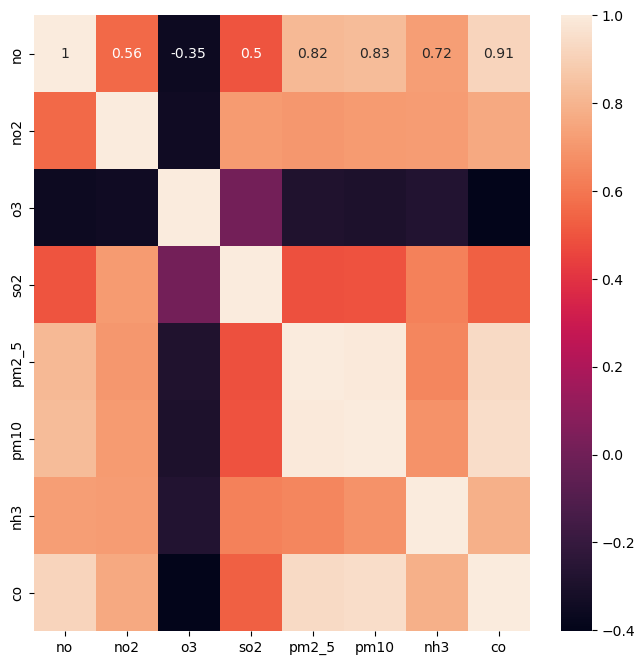

In [13]:
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

<Figure size 1000x1000 with 0 Axes>

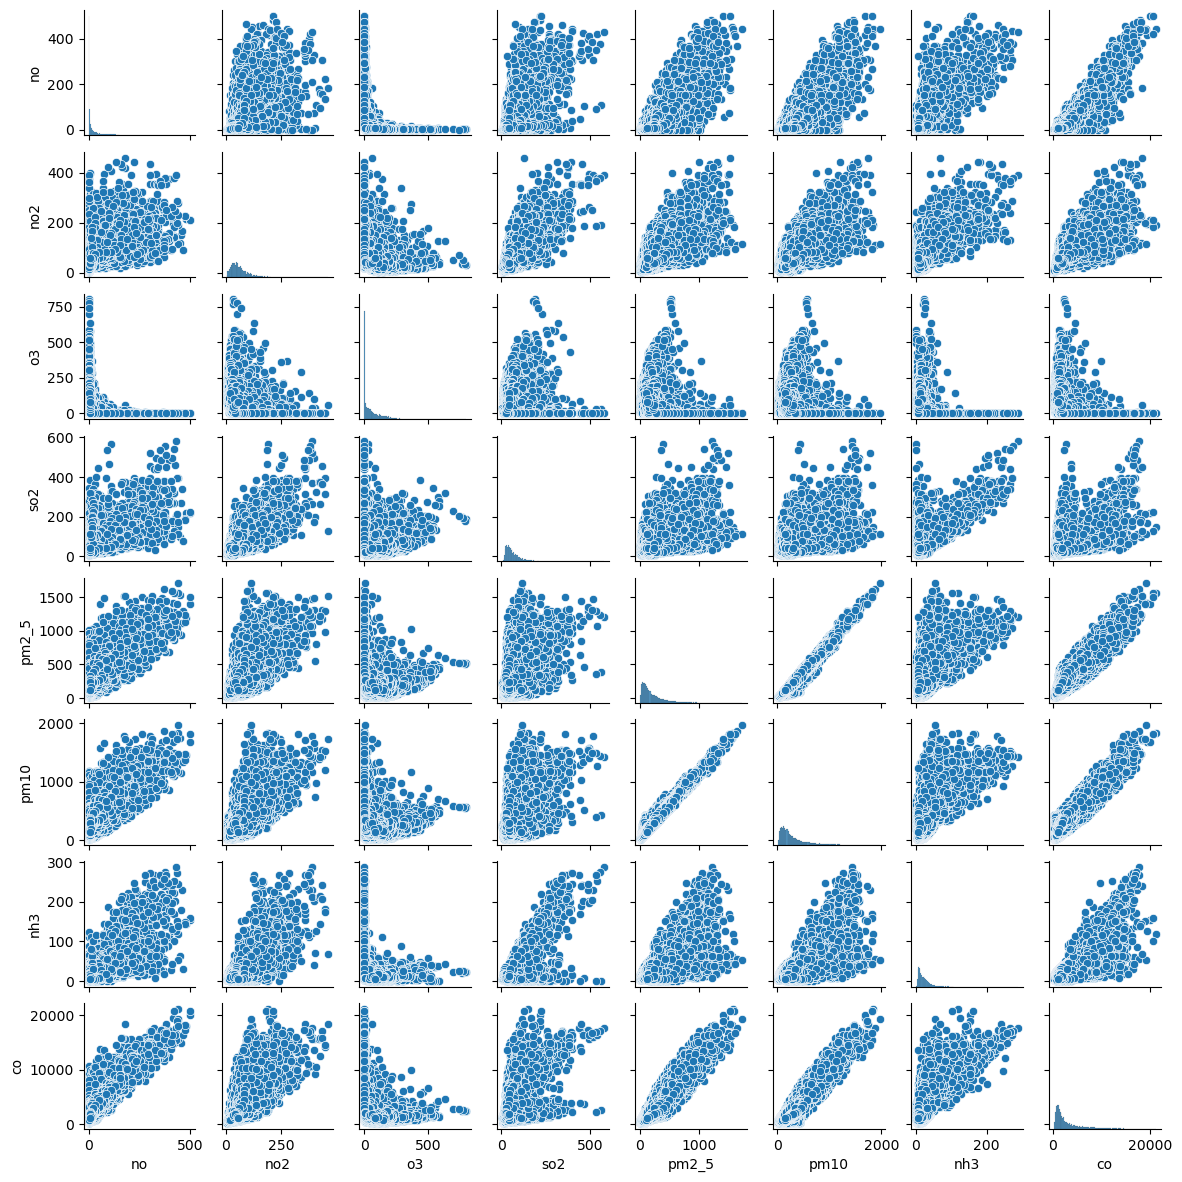

In [14]:
plt.figure(figsize=(10,10))
sns.pairplot(df,height=1.5)
plt.show()

In [15]:
X=df['pm10'].values.reshape(-1,1)
Y=df['co'].values

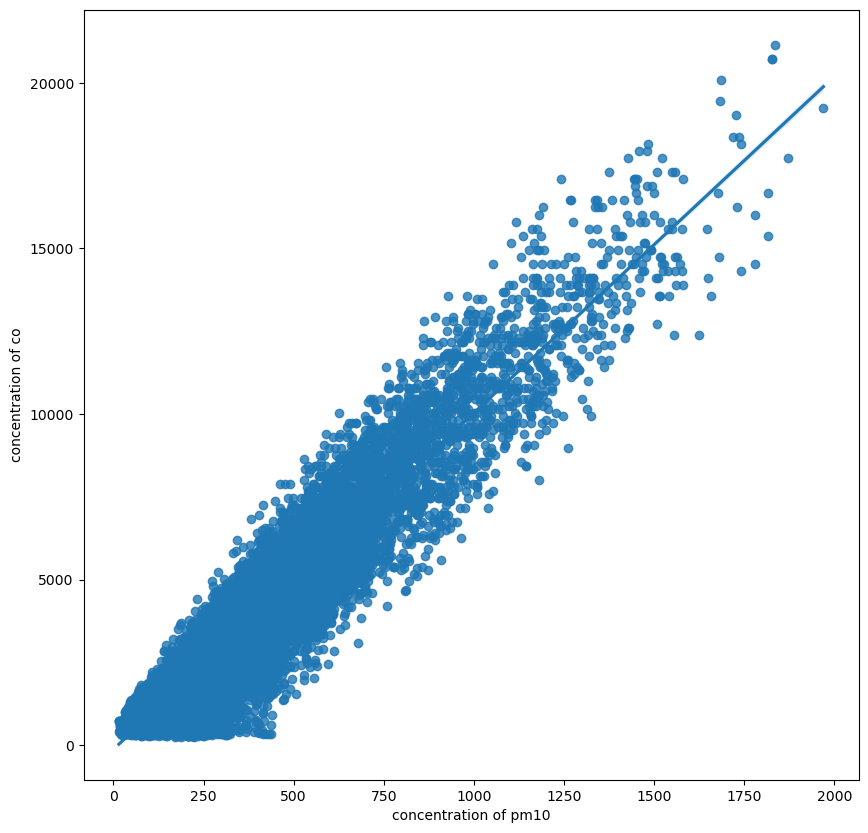

In [22]:
plt.figure(figsize=(10,10));
sns.regplot(x=X, y=Y, data=df)
plt.xlabel('concentration of pm10')
plt.ylabel("concentration of co")
plt.show()

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaled=scaler.fit_transform(X)

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(scaled,Y,test_size=0.2,random_state=42)

In [28]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [30]:
print("training score is ",model.score(X_train,y_train))

training score is  0.9023571784571834


In [31]:
print("testing score is ",model.score(X_test,y_test))

testing score is  0.905170848233843


In [32]:
y_Pred=model.predict(X_test)

In [33]:
print("mean squared error is ", r2_score(y_Pred,y_test))

mean squared error is  0.8943031778545882


In [34]:
print("r2 score is  ",r2_score(y_Pred,y_test))

r2 score is   0.8943031778545882


In [35]:
y_Pred

array([8635.9236962 , 3649.86500759, 9764.92302899, ..., 2289.99393342,
        993.62273188, 1312.54221996])